In [23]:
import pandas as pd

# Load your data into a DataFrame (assuming you have a CSV file)
df = pd.read_csv('C:/Users/Abdullah/Downloads/covid.csv')

# Ensure 'time' is in datetime format
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H-%M-%S')

# 1. Drop all columns except "time"
df = df[['time']]

df['day'] = df['time'].dt.strftime('%Y-%m-%d')
df['day']=pd.to_datetime(df['day'])

# 2. Group by "month" and count the rows, then reset the index
df['calls'] = df.groupby('day')['day'].transform('count')


df = df.drop('time', axis=1)
df = df.drop_duplicates()
# Reset the index
df = df.reset_index(drop=True)
# Print the resulting DataFrame and the number of contacts
df.set_index('day',inplace=True)
print(df)



            calls
day              
2020-02-06     32
2020-02-07     44
2020-02-08     41
2020-02-09     52
2020-02-10     40
2020-02-11     49
2020-02-12     41


<AxesSubplot:xlabel='day'>

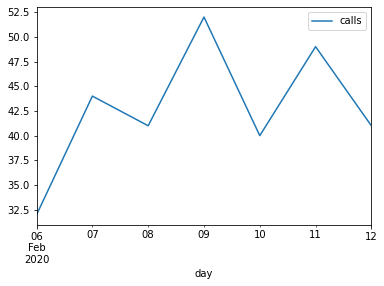

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df.plot()


In [27]:
test_result=adfuller(df['calls'])

In [28]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [29]:
adfuller_test(df['calls'])

ADF Test Statistic : -2.7336224510447122
p-value : 0.06839862597055599
#Lags Used : 1
Number of Observations Used : 5
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [30]:
df['calls First Difference'] = df['calls'] - df['calls'].shift(1)
##D trending

In [31]:
df['calls'].shift(1)

day
2020-02-06     NaN
2020-02-07    32.0
2020-02-08    44.0
2020-02-09    41.0
2020-02-10    52.0
2020-02-11    40.0
2020-02-12    49.0
Name: calls, dtype: float64

In [32]:
adfuller_test(df['calls First Difference'].dropna())

ADF Test Statistic : -6.516817553617596
p-value : 1.0662412570227853e-08
#Lags Used : 0
Number of Observations Used : 5
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


C:\Users\Abdullah\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


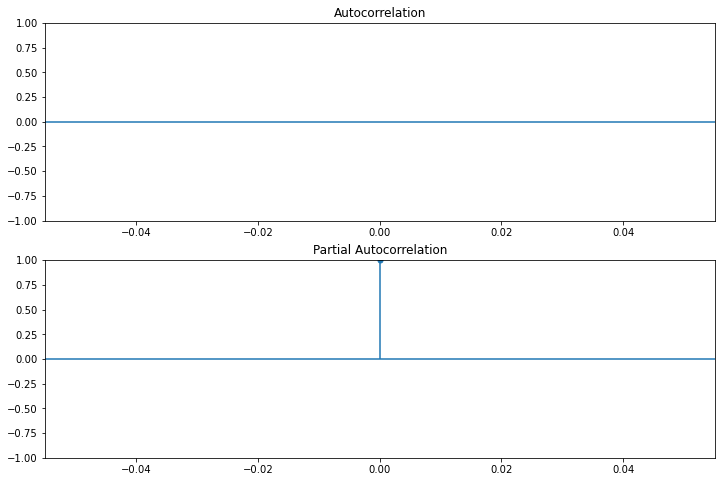

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['calls First Difference'], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['calls First Difference'], ax=ax2, lags=1)  # Set lags to a smaller value
## i = 1
## 
## stationary data has 4 components, seasonality, cycles, noise


In [ ]:
##UNi variate analysis ARIMA model
